In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

sign-language-digits-dataset



[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
 [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
 [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
 ...
 [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
 [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
 [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]


(-0.5, 63.5, 63.5, -0.5)

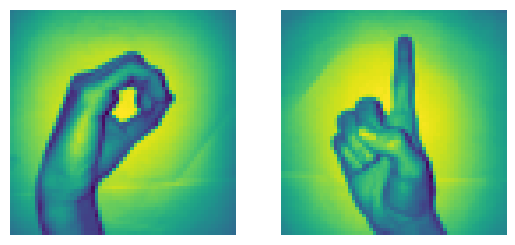

In [19]:
# load data set
x_l = np.load('../input/sign-language-digits-dataset/X.npy')
Y_l = np.load('../input/sign-language-digits-dataset/Y.npy')
print(x_l[0])
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [20]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [21]:
X.shape

(410, 64, 64)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [23]:
X_train.shape

(348, 64, 64)

In [24]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])


In [25]:
Y_train.shape

(348, 1)

In [26]:
#X_trainluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', 
                         input_dim = X_train.shape[1]))
    
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100,batch_size=32)

accuracies = cross_validate(estimator = classifier, X = X_train, y = Y_train, cv = 3,
                            return_train_score=True, return_estimator=True)
mean = accuracies["test_score"].mean()
variance = accuracies["test_score"].std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5259
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.5431
Epoch 11/100
8/8 [===========

2/2 [==============================] - 0s 5ms/step
[1.]


(-0.5, 63.5, 63.5, -0.5)

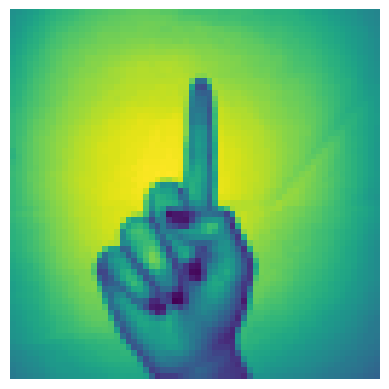

In [27]:
print(accuracies["estimator"][0].predict(X_test)[6])
plt.imshow(X_test[6].reshape(img_size, img_size))
plt.axis('off')

In [28]:
model_0=accuracies["estimator"][0].fit(X_train,Y_train)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6927 - accuracy: 0.4971
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.5230
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.6753
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.8506
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.7989
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.8966
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5992 - accuracy: 0.7356
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5372 - accuracy: 0.8391
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8908
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.9080
Epoch 11/

In [29]:
model_1=accuracies["estimator"][1].fit(X_train,Y_train)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5115
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5057
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5057
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.5144
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5747
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6724
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6061 - accuracy: 0.7845
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.8448
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.8477
Epoch 11/

In [30]:
model_2=accuracies["estimator"][2].fit(X_train,Y_train)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4741
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4943
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4828
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5057
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5057
Epoch 11/

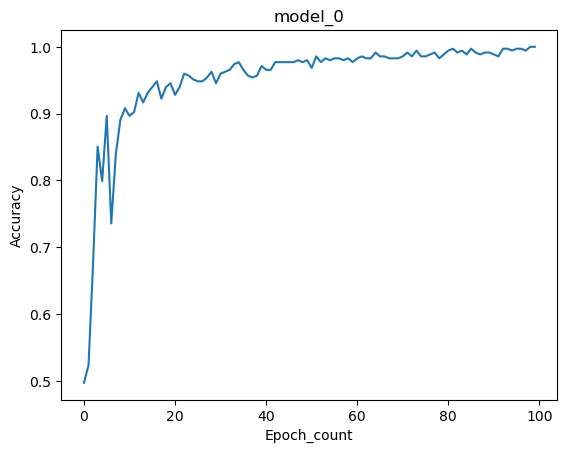

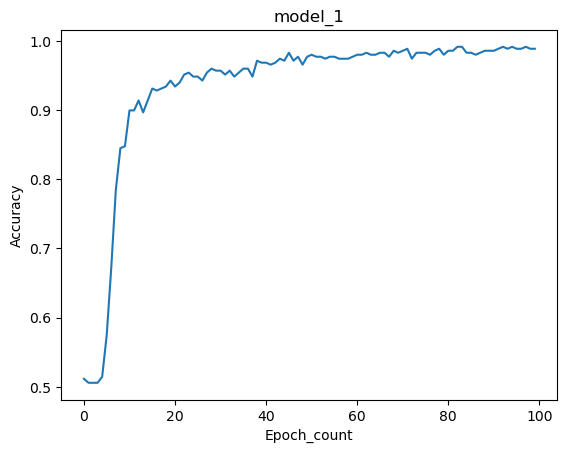

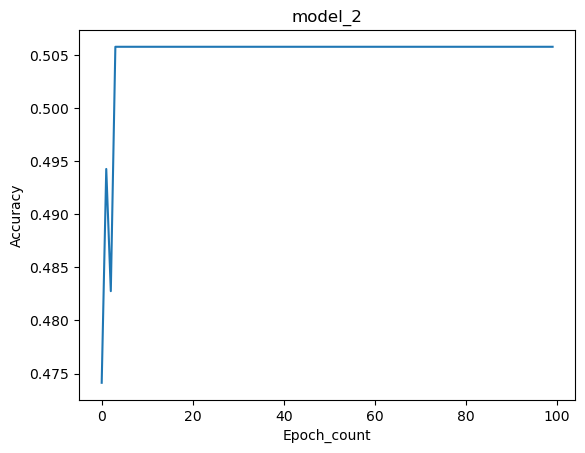

In [31]:
#Visualization of the accuracy of the models according to the epoch value
import matplotlib.pyplot as plt
sayac=0
for model in [model_0,model_1,model_2]:
    plt.plot(model.history["accuracy"])
    plt.title("model_"+str(sayac))
    plt.xlabel("Epoch_count")
    plt.ylabel("Accuracy")
    plt.show()
    sayac+=1